# **The Age of Recommender Systems**

The rapid growth of data collection has led to a new era of information. Data is being used to create more efficient systems and this is where Recommendation Systems come into play.  Recommendation Systems are a type of **information filtering systems** as they improve the quality of search results and provides items that are more relevant to the search item or are realted to the search history of the user.  


They are used to predict the **rating** or **preference** that a user would give to an item. Almost every major tech company has applied them in some form or the other: Amazon uses it to suggest products to customers, YouTube uses it to decide which video to play next on autoplay, and Facebook uses it to recommend pages to like and people to follow. 
Moreover,  companies like Netflix and Spotify  depend highly on the effectiveness of their recommendation engines for their business and sucees.

![](https://i.kinja-img.com/gawker-media/image/upload/s--e3_2HgIC--/c_scale,f_auto,fl_progressive,q_80,w_800/1259003599478673704.jpg)

In this kernel we'll be building a baseline Movie Recommendation System using [TMDB 5000 Movie Dataset](https://www.kaggle.com/tmdb/tmdb-movie-metadata). For novices like me this kernel will pretty much serve as a foundation in recommendation systems and will provide you with something to start with. 

**So let's go!**

There are basically three types of recommender systems:-

> *  **Popularity Based Filtering**- They offer generalized recommendations to every user, based on movie popularity and/or genre. The System recommends the same movies to users with similar demographic features. Since each user is different , this approach is considered to be too simple. The basic idea behind this system is that movies that are more popular and critically acclaimed will have a higher probability of being liked by the average audience.



> *  **Content Based Filtering**- They suggest similar items based on a particular item. This system uses item metadata, such as genre, director, description, actors, etc. for movies, to make these recommendations. The general idea behind these recommender systems is that if a person liked a particular item, he or she will also like an item that is similar to it.

> *  **Collaborative Filtering**- This system matches persons with similar interests and provides recommendations based on this matching. Collaborative filters do not require item metadata like its content-based counterparts.

Let's load the data now.

In [1]:
import pandas as pd 
import numpy as np 
df1=pd.read_csv('credits.csv')
df2=pd.read_csv('movies.csv')

The first dataset contains the following features:-

* movie_id - A unique identifier for each movie.
* cast - The name of lead and supporting actors.
* crew - The name of Director, Editor, Composer, Writer etc.

The second dataset has the following features:- 

* budget - The budget in which the movie was made.
* genre - The genre of the movie, Action, Comedy ,Thriller etc.
* homepage - A link to the homepage of the movie.
* id - This is infact the movie_id as in the first dataset.
* keywords - The keywords or tags related to the movie.
* original_language - The language in which the movie was made.
* original_title - The title of the movie before translation or adaptation.
* overview - A brief description of the movie.
* popularity - A numeric quantity specifying the movie popularity.
* production_companies - The production house of the movie.
* production_countries - The country in which it was produced.
* release_date - The date on which it was released.
* revenue - The worldwide revenue generated by the movie.
* runtime - The running time of the movie in minutes.
* status - "Released" or "Rumored".
* tagline - Movie's tagline.
* title - Title of the movie.
* vote_average -  average ratings the movie recieved.
* vote_count - the count of votes recieved.

Let's join the two dataset on the 'id' column


In [2]:
df1.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [3]:
df1.crew

0       [{"credit_id": "52fe48009251416c750aca23", "de...
1       [{"credit_id": "52fe4232c3a36847f800b579", "de...
2       [{"credit_id": "54805967c3a36829b5002c41", "de...
3       [{"credit_id": "52fe4781c3a36847f81398c3", "de...
4       [{"credit_id": "52fe479ac3a36847f813eaa3", "de...
                              ...                        
4798    [{"credit_id": "52fe44eec3a36847f80b280b", "de...
4799    [{"credit_id": "52fe487dc3a368484e0fb013", "de...
4800    [{"credit_id": "52fe4df3c3a36847f8275ecf", "de...
4801    [{"credit_id": "52fe4ad9c3a368484e16a36b", "de...
4802    [{"credit_id": "58ce021b9251415a390165d9", "de...
Name: crew, Length: 4803, dtype: object

In [4]:
df1.crew[0]

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

In [5]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [6]:
df2.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",10-12-2009,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",19-05-2007,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",26-10-2015,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",16-07-2012,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",07-03-2012,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [7]:
df2.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [8]:
df1.columns = ['id','title_cast','cast','crew']
df2= df2.merge(df1,on='id')

Just a peak at our data.

In [9]:
df2.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,title_cast,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",10-12-2009,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",19-05-2007,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",26-10-2015,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",16-07-2012,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",07-03-2012,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [10]:
df2.shape

(4803, 23)

# **Content Based Filtering**


![](https://www.miquido.com/wp-content/uploads/2023/06/image-700x437.png.webp)


## What are Content-Based Recommender Systems

They make recommendations based on the descriptive attributes of items. To simply put it:

**Content = Description.**

In content-based methods, the ratings and buying behavior of users are combined with the content information available in the items. E.g. Jane likes Terminator movies; based on the similar genre keywords other science fiction movies, such as Alien and Predator will be recommended.
What becomes the training data?

   - The item descriptions, which are labeled with ratings, are used as training data. To create a user-specific classification or regression modeling problem.
   - The class (or dependent) variable corresponds to the specified ratings or buying behavior.
   - These training documents are used to create a classification or regression model, which is specific to the user
   - This user-specific model is used to predict whether the corresponding individual will like an item for which her rating or buying behavior is unknown

## Advantages and Disadvantages of Content-Based Recommender System

**Advantages :**

   - In making recommendations for new items, when sufficient rating data are not available for that item.
   - Even if there is no history of ratings for a particular item; still recommendations can be made.

**Disadvantages :**

   - It becomes very specific to the user’s needs. The community view is ignored here. They are not effective in making recommendations to the new user.
   - It is usually important to have a large number of ratings available for the target user in order to make robust predictions without overfitting.




In this recommender system the content of the movie (overview, cast, crew, keyword, tagline etc) is used to find its similarity with other movies. Then the movies that are most likely to be similar are recommended.




## **Plot description based Recommender**

We will compute pairwise similarity scores for all movies based on their plot descriptions and recommend movies based on that similarity score. The plot description is given in the **overview** feature of our dataset. 
Let's take a look at the data. .. 

In [11]:
df2['overview'].head(5)

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

In [12]:
df2['overview'][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

For any of you who has done even a  bit of text processing before knows we need to convert the word vector of each overview.
Now we'll compute Term Frequency-Inverse Document Frequency (TF-IDF) vectors for each overview.

Now if you are wondering what is term frequency , it is the relative frequency of a word in a document and is given as
   **(term instances/total instances)**.
Inverse Document Frequency is the relative count of documents containing the term is given as 
**log(number of documents/documents with term)**
The overall importance of each word to the documents in which they appear is equal to **TF * IDF**

This will give you a matrix where each column represents a word in the overview vocabulary (all the words that appear in at least one document) and each row represents a movie, as before.This is done to reduce the importance of words that occur frequently in plot overviews and therefore, their significance in computing the final similarity score.

We will Compute Term Frequency-Inverse Document Frequency (TF-IDF) vectors for each overview. The tf–idf weight is a weight often used in information retrieval and text mining. This weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus.

**TF**: The number of times a word appears in a document, divided by the total number of words in that document; Term Frequency, which measures how frequently a term occurs in a document.

**TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document)**.

The second term is the Inverse Document Frequency (IDF), computed as the logarithm of the number of the documents in the corpus divided by the number of documents where the specific term appears.
IDF measures how important a term is.

While computing TF, all terms are considered equally important. Few terms like: and, the, is, of, that; might appear many times but are of little significance. Hence, we need to weigh down the frequent terms while scaling up the rare ones, by computing the following:

**IDF(t) = log_e(Total number of documents / Number of documents with term t in it)**.

Applying TF-IDF in our example; we obtain a matrix, where each column represents a word in the overview vocabulary (all the words that appear in at least one document) and each row represents a movie, as before. This is done to reduce the importance of words that occur frequently in plot overviews and therefore, their significance in computing the final similarity score.

Fortunately, scikit-learn gives you a built-in TfIdfVectorizer class that produces the TF-IDF matrix in a couple of lines. That's great, isn't it? 

In [13]:
df2.isna().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
title_cast                 0
cast                       0
crew                       0
dtype: int64

In [14]:
#Replace NaN with an empty string
df2['overview'] = df2['overview'].fillna('')

In [15]:
df2.isna().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   0
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
title_cast                 0
cast                       0
crew                       0
dtype: int64

In [16]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')


In [17]:
#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df2['overview'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(4803, 20978)

In [18]:
print(tfidf_matrix)

  (0, 3545)	0.27493285363270825
  (0, 795)	0.2084074203878777
  (0, 14754)	0.26556705630591243
  (0, 13355)	0.2537072195025191
  (0, 7414)	0.2153609580612842
  (0, 19054)	0.23864791282019557
  (0, 12269)	0.1778447209530258
  (0, 19671)	0.24152597853522884
  (0, 13644)	0.29248619979162926
  (0, 12411)	0.27155366980600426
  (0, 5519)	0.27863433071832444
  (0, 11667)	0.2580267910376776
  (0, 13680)	0.3411386462681145
  (0, 3232)	0.19886014555883547
  (0, 225)	0.3055534742040413
  (1, 14969)	0.2764509091386784
  (1, 18376)	0.37466189442120984
  (1, 6188)	0.2743698871995736
  (1, 19418)	0.3060153616124342
  (1, 6016)	0.1966138874334538
  (1, 6069)	0.2948248727159851
  (1, 8674)	0.2809447973706985
  (1, 11025)	0.12158034118460531
  (1, 3843)	0.19195626583733216
  (1, 4854)	0.19967394354414503
  :	:
  (4802, 5841)	0.34247058916908363
  (4802, 4576)	0.15002600185636672
  (4802, 10126)	0.15121328276821538
  (4802, 16409)	0.17123529458454181
  (4802, 4816)	0.14223771161926407
  (4802, 1311)	0.16

In [19]:
for i, feature in enumerate(tfidf.get_feature_names()):
    print(i, feature)

0 00
1 000
2 007
3 07am
4 10
5 100
6 1000
7 101
8 108
9 10th
10 11
11 114
12 117
13 118
14 119
15 11th
16 12
17 1200
18 1215
19 1250
20 125th
21 12th
22 13
23 1300
24 13th
25 14
26 140
27 1408
28 142
29 1429
30 148
31 14pm
32 14th
33 15
34 150
35 150th
36 1520s
37 1536
38 15th
39 16
40 1600s
41 161
42 1630s
43 1644
44 1681
45 1691
46 16th
47 17
48 170
49 1700s
50 173rd
51 1748
52 1776
53 17th
54 18
55 180
56 1800
57 1818
58 1820
59 1820s
60 1824
61 1831
62 1834
63 1836
64 1838
65 1839
66 1841
67 1845
68 1850
69 1850s
70 1856
71 1857
72 1860
73 1862
74 1863
75 1870s
76 1875
77 1876
78 1879
79 1880s
80 1882
81 1885
82 1889
83 1890
84 1890s
85 18th
86 19
87 1900
88 1900s
89 1903
90 1905
91 191
92 1910
93 1910s
94 1911
95 1912
96 1914
97 1915
98 1917
99 1918
100 1919
101 1920
102 1920s
103 1921
104 1922
105 1924
106 1925
107 1926
108 1927
109 1928
110 1929
111 1930
112 1930s
113 1931
114 1932
115 1933
116 1934
117 1936
118 1937
119 1939
120 1940
121 1940s
122 1941
123 1942
124 1943
125 194

C:\Users\Ubaid Shah\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


guru
8401 gus
8402 gush
8403 gusteau
8404 gusto
8405 gut
8406 gutierrez
8407 guy
8408 guys
8409 guzman
8410 guzzling
8411 gwen
8412 gwyneth
8413 gyllenhaal
8414 gym
8415 gymnast
8416 gymnastics
8417 gynaecologist
8418 gypsies
8419 gypsy
8420 györgy
8421 ha
8422 haagen
8423 habit
8424 habitat
8425 habitats
8426 habits
8427 habitual
8428 hablac
8429 hack
8430 hacked
8431 hacker
8432 hacking
8433 hackman
8434 hacks
8435 hackus
8436 hadassah
8437 haddock
8438 haddonfield
8439 hades
8440 hadir
8441 hadley
8442 haeundae
8443 hai
8444 hailed
8445 hailing
8446 hails
8447 haines
8448 hair
8449 hairdo
8450 hairdresser
8451 haired
8452 hairs
8453 hairstylist
8454 hairy
8455 hal
8456 hale
8457 halen
8458 haley
8459 half
8460 halftime
8461 halfway
8462 hall
8463 halle
8464 hallelujer
8465 hallet
8466 halley
8467 halliburton
8468 halloran
8469 hallowed
8470 halloween
8471 hallows
8472 halls
8473 hallucinates
8474 hallucinations
8475 hallucinogenic
8476 hallum
8477 halt
8478 ham
8479 hamada
8480 hamb

We see that over 20,000 different words were used to describe the 4800 movies in our dataset.

With this matrix in hand, we can now compute a similarity score. There are several candidates for this; such as the euclidean, the Pearson and the [cosine similarity scores](https://en.wikipedia.org/wiki/Cosine_similarity). There is no right answer to which score is the best. Different scores work well in different scenarios and it is often a good idea to experiment with different metrics.

We will be using the cosine similarity to calculate a numeric quantity that denotes the similarity between two movies. We use the cosine similarity score since it is independent of magnitude and is relatively easy and fast to calculate. Mathematically, it is defined as follows:

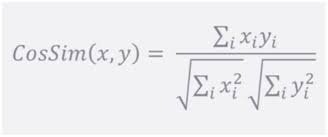

Since we have used the TF-IDF vectorizer, calculating the dot product will directly give us the cosine similarity score. Therefore, we will use sklearn's **linear_kernel()** instead of cosine_similarities() since it is faster.

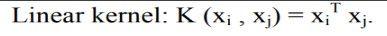

In [20]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [21]:
cosine_sim.shape

(4803, 4803)

In [22]:
cosine_sim[1]

array([0.        , 1.        , 0.        , ..., 0.02160533, 0.        ,
       0.        ])

We are going to define a function that takes in a movie title as an input and outputs a list of the 10 most similar movies. Firstly, for this, we need a reverse mapping of movie titles and DataFrame indices. In other words, we need a mechanism to identify the index of a movie in our metadata DataFrame, given its title.

In [23]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(df2.index, index=df2['title']).drop_duplicates()


In [24]:
indices[:10]

title
Avatar                                      0
Pirates of the Caribbean: At World's End    1
Spectre                                     2
The Dark Knight Rises                       3
John Carter                                 4
Spider-Man 3                                5
Tangled                                     6
Avengers: Age of Ultron                     7
Harry Potter and the Half-Blood Prince      8
Batman v Superman: Dawn of Justice          9
dtype: int64

In [25]:
# indices[title]
indices['Avatar']

0

In [26]:
indices['Tangled']

6

In [27]:
sim_scor=list(enumerate(cosine_sim[6]))
sim_scor

[(0, 0.0),
 (1, 0.0),
 (2, 0.0),
 (3, 0.01260063243546246),
 (4, 0.009339192776152496),
 (5, 0.0),
 (6, 0.9999999999999997),
 (7, 0.011880508658933947),
 (8, 0.0),
 (9, 0.017281047307512815),
 (10, 0.0),
 (11, 0.0),
 (12, 0.0),
 (13, 0.03147510421498382),
 (14, 0.0),
 (15, 0.0),
 (16, 0.0),
 (17, 0.0),
 (18, 0.006059000507502172),
 (19, 0.0),
 (20, 0.006425440386130896),
 (21, 0.0),
 (22, 0.0),
 (23, 0.0),
 (24, 0.011600736249819315),
 (25, 0.0037186834259722813),
 (26, 0.0),
 (27, 0.0),
 (28, 0.007475389591000118),
 (29, 0.007386612989462493),
 (30, 0.0),
 (31, 0.0),
 (32, 0.0),
 (33, 0.0),
 (34, 0.0),
 (35, 0.0),
 (36, 0.010944543219954651),
 (37, 0.0),
 (38, 0.00883070157922894),
 (39, 0.1387852632729485),
 (40, 0.0),
 (41, 0.0),
 (42, 0.02089149978881825),
 (43, 0.0),
 (44, 0.0),
 (45, 0.007758226532831349),
 (46, 0.0),
 (47, 0.0),
 (48, 0.016967721395806497),
 (49, 0.0),
 (50, 0.010717132333966223),
 (51, 0.025274880383252978),
 (52, 0.0),
 (53, 0.0),
 (54, 0.027594734023132943),


In [28]:
sim_scor=sorted(sim_scor, key=lambda x: x[1], reverse=True)
sim_scor

[(6, 0.9999999999999997),
 (2309, 0.1483704069269145),
 (39, 0.1387852632729485),
 (330, 0.09928041810579961),
 (4714, 0.08024561266254449),
 (1470, 0.0775257419906493),
 (1484, 0.07461247039136353),
 (256, 0.07174485799455518),
 (1984, 0.07170270953801038),
 (986, 0.06744046122528619),
 (2155, 0.06633861642285284),
 (4614, 0.06448455802789926),
 (506, 0.06349108574448303),
 (4320, 0.06275889235796488),
 (4633, 0.06163998522093788),
 (403, 0.058894783577941055),
 (4267, 0.05885532697021312),
 (2582, 0.05836672087968463),
 (3744, 0.0578309512643461),
 (4560, 0.057367694551513804),
 (2966, 0.05661494627383549),
 (3131, 0.05632759844426458),
 (4191, 0.05623540383477137),
 (1059, 0.05575433476974248),
 (734, 0.055019567180154515),
 (1249, 0.05426139375792797),
 (3073, 0.05353032044682046),
 (2618, 0.05198285733065488),
 (2544, 0.05157963576963166),
 (3818, 0.05114736824811568),
 (3882, 0.05082926955565479),
 (63, 0.0504833530967919),
 (2821, 0.050222980621281076),
 (3991, 0.050131633110150

In [29]:
# Get the scores of the 10 most similar movies
sim_scor = sim_scor[1:11]
sim_scor

[(2309, 0.1483704069269145),
 (39, 0.1387852632729485),
 (330, 0.09928041810579961),
 (4714, 0.08024561266254449),
 (1470, 0.0775257419906493),
 (1484, 0.07461247039136353),
 (256, 0.07174485799455518),
 (1984, 0.07170270953801038),
 (986, 0.06744046122528619),
 (2155, 0.06633861642285284)]

In [30]:
# Get the movie indices
sim_scor[0][0]

2309

In [31]:
ind=[i[0] for i in sim_scor]

In [32]:
ind

[2309, 39, 330, 4714, 1470, 1484, 256, 1984, 986, 2155]

In [33]:
df2.title.iloc[ind]

2309                           Out of Inferno
39                               TRON: Legacy
330     The Lord of the Rings: The Two Towers
4714                 An American in Hollywood
1470                                   Stolen
1484                        Snakes on a Plane
256                                 Allegiant
1984                The Thief and the Cobbler
986                             Your Highness
2155                          The World's End
Name: title, dtype: object

In [34]:
pd.DataFrame(df2[['title','genres']].iloc[ind])

,title,genres
2309,Out of Inferno,"[{""id"": 28, ""name"": ""Action""}]"
39,TRON: Legacy,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""..."
330,The Lord of the Rings: The Two Towers,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""..."
4714,An American in Hollywood,[]
1470,Stolen,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam..."
1484,Snakes on a Plane,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam..."
256,Allegiant,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 878, ..."
1984,The Thief and the Cobbler,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""..."
986,Your Highness,"[{""id"": 35, ""name"": ""Comedy""}]"
2155,The World's End,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 28, ""nam..."


We are now in a good position to define our recommendation function. These are the following steps we'll follow :-
* Get the index of the movie given its title.
* Get the list of cosine similarity scores for that particular movie with all movies. Convert it into a list of tuples where the first element is its position and the second is the similarity score.
* Sort the aforementioned list of tuples based on the similarity scores; that is, the second element.
* Get the top 10 elements of this list. Ignore the first element as it refers to self (the movie most similar to a particular movie is the movie itself).
* Return the titles corresponding to the indices of the top elements.

In [35]:
df2.genres[0]

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [36]:
'''ast — Abstract Syntax Trees -
The ast module helps Python applications to process trees of the Python abstract syntax grammar.'''

import ast 

In [37]:
def convert(obj):
    L=[]
    for i in ast.literal_eval(obj):
        L.append(i['name'])
    return L

In [38]:
df2['genres']=df2['genres'].apply(convert)

In [39]:
df2.genres[0]

['Action', 'Adventure', 'Fantasy', 'Science Fiction']

In [40]:
pd.DataFrame(df2[['title','genres']].iloc[ind])

,title,genres
2309,Out of Inferno,[Action]
39,TRON: Legacy,"[Adventure, Action, Science Fiction]"
330,The Lord of the Rings: The Two Towers,"[Adventure, Fantasy, Action]"
4714,An American in Hollywood,[]
1470,Stolen,"[Action, Crime, Drama, Thriller]"
1484,Snakes on a Plane,"[Action, Crime, Horror, Thriller]"
256,Allegiant,"[Adventure, Science Fiction]"
1984,The Thief and the Cobbler,"[Adventure, Fantasy, Animation, Science Fictio..."
986,Your Highness,[Comedy]
2155,The World's End,"[Comedy, Action, Science Fiction]"


In [41]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return pd.DataFrame((df2[['title','genres']].iloc[movie_indices]))

In [42]:
get_recommendations('The Dark Knight Rises')

,title,genres
65,The Dark Knight,"[Drama, Action, Crime, Thriller]"
299,Batman Forever,"[Action, Crime, Fantasy]"
428,Batman Returns,"[Action, Fantasy]"
1359,Batman,"[Fantasy, Action]"
3854,"Batman: The Dark Knight Returns, Part 2","[Action, Animation]"
119,Batman Begins,"[Action, Crime, Drama]"
2507,Slow Burn,"[Mystery, Crime, Drama, Thriller]"
9,Batman v Superman: Dawn of Justice,"[Action, Adventure, Fantasy]"
1181,JFK,"[Drama, Thriller, History]"
210,Batman & Robin,"[Action, Crime, Fantasy]"


In [43]:
get_recommendations('The Avengers')

,title,genres
7,Avengers: Age of Ultron,"[Action, Adventure, Science Fiction]"
3144,Plastic,"[Drama, Action, Comedy, Crime]"
1715,Timecop,"[Thriller, Science Fiction, Action, Crime]"
4124,This Thing of Ours,"[Drama, Action, Thriller]"
3311,Thank You for Smoking,"[Comedy, Drama]"
3033,The Corruptor,"[Action, Crime, Mystery, Thriller]"
588,Wall Street: Money Never Sleeps,"[Drama, Crime]"
2136,Team America: World Police,"[Music, Adventure, Animation, Action, Comedy]"
1468,The Fountain,"[Drama, Adventure, Science Fiction, Romance]"
1286,Snowpiercer,"[Action, Science Fiction, Drama]"


While our system has done a decent job of finding movies with similar plot descriptions, the quality of recommendations is not that great. "The Dark Knight Rises" returns all Batman movies while it is more likely that the people who liked that movie are more inclined to enjoy other Christopher Nolan movies. This is something that cannot be captured by the present system.